In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

# On fixe la graine
random.seed(42)

In [48]:
data=pd.read_csv("data_seed2.txt", sep="\t", decimal=",", dtype="object")
data.columns = data.columns.str.lower()
data.head()

,datdelhis_mm0,numtecprs,sldcrdmms_sum_mm1,engagement_sum_mm1,top_pret_conso_mm1,nbr_pret_conso_mm1,sldcrdmms_sum_mm2,engagement_sum_mm2,top_pret_conso_mm2,nbr_pret_conso_mm2,...,crtad_ag_solde_t1,crtad_ag_solde_t2,encours_par,crtad_ag_nbjde_bb,crtad_ag_nbjde_ba,crtad_ag_nbjde_bc,topcptlitig,somme_encours,cible,rnd_1_20
0,202 410,9 201 003 869,"0,00","800,00","0,00","0,00","0,00","800,00","0,00","0,00",...,"-47 333,00","-13 333,00","0,00","92,00","262,00","5,00",0,"0,00",0,2
1,202 410,9 599 624 616,"1 152,00","200,00","0,00","0,00","1 755,00","200,00","0,00","0,00",...,"-3 333,00","-3 000,00","1 000,00","71,00","321,00","54,00",0,"1 000,00",0,2
2,202 412,1 413 515 491,"87 805,00","6 680,61","1,00","1,00","76 354,00","6 738,46","1,00","1,00",...,"220 333,00","146 666,00","157 084,00","0,00","13,00","0,00",0,"157 084,00",0,2
3,202 404,1 600 773 833,"2 468,00","200,00","0,00","0,00","2 534,00","200,00","0,00","0,00",...,"3 666,00","8 333,00","57 333,00","12,00","17,00","0,00",0,"57 333,00",0,2
4,202 409,2 661 466 041,"513 708,00","1 000,00","0,00","0,00","257 317,00","1 000,00","0,00","0,00",...,"370 333,00","210 666,00","0,00","9,00","247,00","60,00",0,"0,00",0,2


In [50]:
def ajouter_mois_depuis_colonne(df, colonne):
    # Dictionnaire de correspondance chiffre → mois
    mois_map = {
        '01': 'Jan', '02': 'Fev', '03': 'Mars', '04': 'Avril',
        '05': 'Mai', '06': 'Juin', '07': 'Juil', '08': 'Août',
        '09': 'Sept', '10': 'Oct', '11': 'Nov', '12': 'Dec'
    }

    def extraire_mois(val):
        # Convertir en string et extraire les deux derniers chiffres
        deux_derniers = str(val)[-2:]
        # Retourner le mois si possible
        return mois_map.get(deux_derniers, None)
    months= df[colonne].apply(extraire_mois)
    return months

In [51]:
data["month"]=ajouter_mois_depuis_colonne(data, "datdelhis_mm0")
data.head()

,datdelhis_mm0,numtecprs,sldcrdmms_sum_mm1,engagement_sum_mm1,top_pret_conso_mm1,nbr_pret_conso_mm1,sldcrdmms_sum_mm2,engagement_sum_mm2,top_pret_conso_mm2,nbr_pret_conso_mm2,...,crtad_ag_solde_t2,encours_par,crtad_ag_nbjde_bb,crtad_ag_nbjde_ba,crtad_ag_nbjde_bc,topcptlitig,somme_encours,cible,rnd_1_20,month
0,202 410,9 201 003 869,"0,00","800,00","0,00","0,00","0,00","800,00","0,00","0,00",...,"-13 333,00","0,00","92,00","262,00","5,00",0,"0,00",0,2,Oct
1,202 410,9 599 624 616,"1 152,00","200,00","0,00","0,00","1 755,00","200,00","0,00","0,00",...,"-3 000,00","1 000,00","71,00","321,00","54,00",0,"1 000,00",0,2,Oct
2,202 412,1 413 515 491,"87 805,00","6 680,61","1,00","1,00","76 354,00","6 738,46","1,00","1,00",...,"146 666,00","157 084,00","0,00","13,00","0,00",0,"157 084,00",0,2,Dec
3,202 404,1 600 773 833,"2 468,00","200,00","0,00","0,00","2 534,00","200,00","0,00","0,00",...,"8 333,00","57 333,00","12,00","17,00","0,00",0,"57 333,00",0,2,Avril
4,202 409,2 661 466 041,"513 708,00","1 000,00","0,00","0,00","257 317,00","1 000,00","0,00","0,00",...,"210 666,00","0,00","9,00","247,00","60,00",0,"0,00",0,2,Sept


In [52]:
##présence de données manquantes
data.loc[[345,]]

,datdelhis_mm0,numtecprs,sldcrdmms_sum_mm1,engagement_sum_mm1,top_pret_conso_mm1,nbr_pret_conso_mm1,sldcrdmms_sum_mm2,engagement_sum_mm2,top_pret_conso_mm2,nbr_pret_conso_mm2,...,crtad_ag_solde_t2,encours_par,crtad_ag_nbjde_bb,crtad_ag_nbjde_ba,crtad_ag_nbjde_bc,topcptlitig,somme_encours,cible,rnd_1_20,month
345,202 410,5 510 074 447,"14 473,00","117 279,66","0,00","0,00","19 523,00","117 912,64","0,00","0,00",...,?,?,?,?,?,?,?,0,2,Oct


In [53]:
any(data.isna().sum())

False

In [54]:
data.dtypes

datdelhis_mm0         object
numtecprs             object
sldcrdmms_sum_mm1     object
engagement_sum_mm1    object
top_pret_conso_mm1    object
                       ...  
topcptlitig           object
somme_encours         object
cible                 object
rnd_1_20              object
month                 object
Length: 131, dtype: object

In [57]:
def convert_if_numeric(col):
    if col.dtype == "object":
        # Supprimer tous les espaces, y compris espace insécable
        cleaned = col.str.replace("\u202f", "")
        # Remplacer la virgule décimale par un point
        cleaned = cleaned.str.replace(",", ".")
        # Essayer de convertir en numérique
        numeric_col = pd.to_numeric(cleaned, errors="coerce")
        # Si au moins une valeur numérique existe, on remplace la colonne
        if numeric_col.notna().any():
            return numeric_col
    return col

# Appliquer la fonction à toutes les colonnes
data = data.apply(convert_if_numeric)
data.head()

,datdelhis_mm0,numtecprs,sldcrdmms_sum_mm1,engagement_sum_mm1,top_pret_conso_mm1,nbr_pret_conso_mm1,sldcrdmms_sum_mm2,engagement_sum_mm2,top_pret_conso_mm2,nbr_pret_conso_mm2,...,crtad_ag_solde_t2,encours_par,crtad_ag_nbjde_bb,crtad_ag_nbjde_ba,crtad_ag_nbjde_bc,topcptlitig,somme_encours,cible,rnd_1_20,month
0,202410,9201003869,0.0,800.00,0.0,0.0,0.0,800.00,0.0,0.0,...,-13333.0,0.0,92.0,262.0,5.0,0.0,0.0,0,2,Oct
1,202410,9599624616,1152.0,200.00,0.0,0.0,1755.0,200.00,0.0,0.0,...,-3000.0,1000.0,71.0,321.0,54.0,0.0,1000.0,0,2,Oct
2,202412,1413515491,87805.0,6680.61,1.0,1.0,76354.0,6738.46,1.0,1.0,...,146666.0,157084.0,0.0,13.0,0.0,0.0,157084.0,0,2,Dec
3,202404,1600773833,2468.0,200.00,0.0,0.0,2534.0,200.00,0.0,0.0,...,8333.0,57333.0,12.0,17.0,0.0,0.0,57333.0,0,2,Avril
4,202409,2661466041,513708.0,1000.00,0.0,0.0,257317.0,1000.00,0.0,0.0,...,210666.0,0.0,9.0,247.0,60.0,0.0,0.0,0,2,Sept


In [58]:
data.loc[[345,]]

,datdelhis_mm0,numtecprs,sldcrdmms_sum_mm1,engagement_sum_mm1,top_pret_conso_mm1,nbr_pret_conso_mm1,sldcrdmms_sum_mm2,engagement_sum_mm2,top_pret_conso_mm2,nbr_pret_conso_mm2,...,crtad_ag_solde_t2,encours_par,crtad_ag_nbjde_bb,crtad_ag_nbjde_ba,crtad_ag_nbjde_bc,topcptlitig,somme_encours,cible,rnd_1_20,month
345,202410,5510074447,14473.0,117279.66,0.0,0.0,19523.0,117912.64,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,Oct


In [59]:
##variables ont des NA
var_with_na=data.isna().sum()
var_with_na[var_with_na>0]

sldcrdmms_sum_mm1     110
engagement_sum_mm1    110
top_pret_conso_mm1    110
nbr_pret_conso_mm1    110
sldcrdmms_sum_mm2     194
                     ... 
crtad_ag_nbjde_bb      40
crtad_ag_nbjde_ba      40
crtad_ag_nbjde_bc      40
topcptlitig            40
somme_encours          40
Length: 92, dtype: int64

In [60]:
print(data.dtypes)
print("\n")
print("Nombre de variables par type\n", data.dtypes.value_counts())

datdelhis_mm0           int64
numtecprs               int64
sldcrdmms_sum_mm1     float64
engagement_sum_mm1    float64
top_pret_conso_mm1    float64
                       ...   
topcptlitig           float64
somme_encours         float64
cible                   int64
rnd_1_20                int64
month                  object
Length: 131, dtype: object


Nombre de variables par type
 float64    118
int64       11
object       2
Name: count, dtype: int64


In [61]:
##reperer les colonnes constantes
def all_constant_columns(df):
    result=[]
    for col in df.columns:
        if df[col].nunique() == 1:
            result.append(col)
    return result
all_constant_columns(data)

['indrskdtx', 'ratio_mensu_imo_solde_dbtsum', 'rnd_1_20']

In [62]:
## Je constate qu'il y a de variables categorielles à valeurs numériques mais prises comme des nombres
# Ici je les repertorie et je les transforme en 'category'
## Sauf les variables: 'sum_nombre_contrat_imo', 'nbr_pret_conso'...le reste des variables int et 0/1 sont catgeorielles

var_binaires = [col for col in data.columns if data[col].dropna().isin([0, 1]).all()]
var_int = list(data.select_dtypes(include='int64').columns)
var_non_concerned=['sum_nombre_contrat_imo', 'nbr_pret_conso', 'cible']

var_finales_concerned = list(set(var_binaires + var_int) - set(var_non_concerned))
for var in var_finales_concerned:
    data[var]=data[var].astype("category")

In [63]:
print(data.dtypes)
print("\n")
print("Nombre de variables par type\n", data.dtypes.value_counts())

datdelhis_mm0         category
numtecprs             category
sldcrdmms_sum_mm1      float64
engagement_sum_mm1     float64
top_pret_conso_mm1    category
                        ...   
topcptlitig           category
somme_encours          float64
cible                    int64
rnd_1_20              category
month                   object
Length: 131, dtype: object


Nombre de variables par type
 float64     99
category    17
category     3
int64        3
category     2
object       2
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64


In [64]:
y=data.cible
X=data.drop(all_constant_columns(data)+["cible","datdelhis_mm0", "numtecprs"], axis=1) ##on supprime les variables d'identification

In [311]:
data.to_csv("data_with_na_explicited.csv", sep=";", header=True)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20 % des données pour le test
    random_state=42,     # pour reproductibilité (comme set.seed en R)
    stratify=y
)

In [66]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
##Création des transformations de variables

In [67]:
X_train.describe()

,sldcrdmms_sum_mm1,engagement_sum_mm1,nbr_pret_conso_mm1,sldcrdmms_sum_mm2,engagement_sum_mm2,nbr_pret_conso_mm2,sldcrdmms_sum_mm3,nbr_pret_conso_mm3,engagement_sum_mm3,sldcrdmms_sum_mm4,...,ratio_nbretcar_engagement_sum,ndb_modele_mm3_mm1_sum,crtad_ag_solde_t,crtad_ag_solde_t1,crtad_ag_solde_t2,encours_par,crtad_ag_nbjde_bb,crtad_ag_nbjde_ba,crtad_ag_nbjde_bc,somme_encours
count,4.315600e+04,4.315600e+04,43156.000000,4.309300e+04,4.309300e+04,43093.000000,4.301800e+04,43018.000000,4.301800e+04,4.290800e+04,...,43208.000000,42980.000000,4.320900e+04,4.320900e+04,4.320900e+04,4.320800e+04,43209.000000,43209.000000,43209.000000,4.320900e+04
mean,2.888081e+05,5.587023e+04,0.250046,2.907512e+05,5.593082e+04,0.249623,2.903638e+05,0.248640,5.593140e+04,2.914386e+05,...,0.005543,0.001024,6.531809e+05,6.583670e+05,6.652917e+05,3.341192e+06,16.850101,80.454095,15.369067,3.341115e+06
std,1.977430e+06,1.600712e+05,0.556333,1.911278e+06,1.602908e+05,0.554590,1.893145e+06,0.553453,1.607028e+05,1.835135e+06,...,0.071491,0.050118,3.075167e+06,2.987290e+06,2.992257e+06,3.112401e+07,28.744881,130.779969,27.772614,3.112365e+07
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,-3.357450e+08,-3.214533e+08,-3.243515e+08,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,1.239100e+04,5.000000e+02,0.000000,1.245600e+04,5.000000e+02,0.000000,1.256625e+04,0.000000,5.000000e+02,1.257800e+04,...,0.000000,0.000000,2.916600e+04,2.850000e+04,2.883300e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
50%,4.665000e+04,1.602970e+03,0.000000,4.676800e+04,1.600000e+03,0.000000,4.652950e+04,0.000000,1.600000e+03,4.645550e+04,...,0.000000,0.000000,1.116660e+05,1.113330e+05,1.118330e+05,2.220000e+05,0.000000,9.000000,0.000000,2.220000e+05
75%,1.693988e+05,3.565920e+04,0.000000,1.697740e+05,3.520686e+04,0.000000,1.697215e+05,0.000000,3.520683e+04,1.719618e+05,...,0.000000,0.000000,3.940000e+05,3.980000e+05,3.981660e+05,2.140122e+06,23.000000,111.000000,18.000000,2.139749e+06
max,3.140236e+08,1.200133e+07,7.000000,3.039003e+08,1.200018e+07,7.000000,3.140389e+08,7.000000,1.200001e+07,2.937861e+08,...,5.150000,3.000000,1.976322e+08,1.496978e+08,1.536060e+08,5.581015e+09,266.000000,1321.000000,313.000000,5.581015e+09


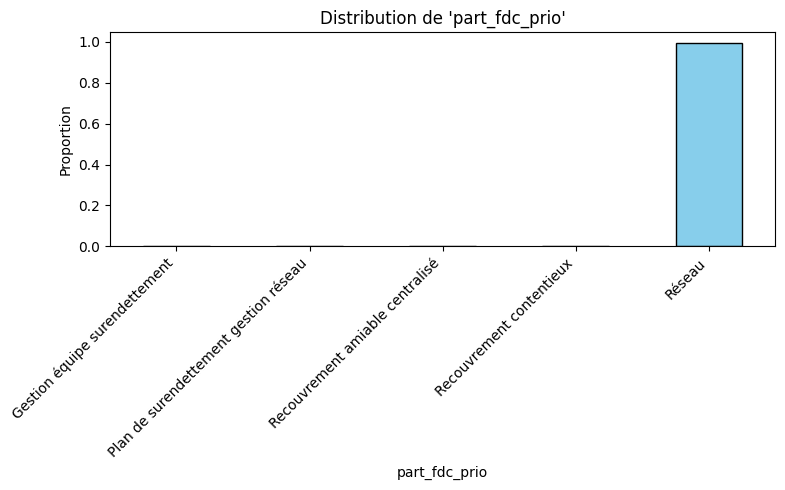

In [68]:
def plot_categorical_distribution(df, var, target=None):
    plt.figure(figsize=(8, 5))

    if target is None:
        # Distribution simple
        df[var].value_counts(normalize=True).sort_index().plot(
            kind='bar', color='skyblue', edgecolor='black'
        )
        plt.title(f"Distribution de '{var}'")
        plt.ylabel("Proportion")
        plt.xlabel(var)
    else:
        # Distribution par classe cible
        prop_df = (
            df.groupby([var, target])
              .size()
              .groupby(level=0)
              .apply(lambda x: x / x.sum())
              .unstack()
        )

        prop_df.plot(kind='bar', stacked=False, color=['lightcoral', 'skyblue'], edgecolor='black')
        plt.title(f"Distribution de '{var}' selon '{target}'")
        plt.ylabel("Proportion")
        plt.xlabel(var)
        plt.legend(title=target)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_categorical_distribution(data,'part_fdc_prio')

In [69]:
from scipy.stats import chi2_contingency
from scipy.stats import kruskal

def cramers_v(data, x, y, seuil=5):
    # Table de contingence
    data2=data.copy()
    data2= data[[x, y]].dropna()
    table = pd.crosstab(data2[x], data2[y])
    # Test du chi-deux
    chi2, _, _, expected = chi2_contingency(table)
    # Calcul du V de Cramer
    n = table.sum().sum()
    k = min(table.shape) - 1
    v = np.sqrt(chi2 / (n * k))
    validite=False
    if (expected >= seuil).all():
        validite=True
    return v, validite

def kruskal_by_target(df, col_quanti, col_cible):
    # Séparer les groupes selon la cible
    data=df.copy()
    data = data[[col_quanti, col_cible]].dropna()
    group0 = data[data[col_cible] == 0][col_quanti]
    group1 = data[data[col_cible] == 1][col_quanti]

    # Effectuer le test de Kruskal-Wallis
    stat, p_value = kruskal(group0, group1)
    return stat, p_value

def analyze_features(df, col_cible):
    results = []

    for col in df.columns:
        if col == col_cible:
            continue

        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            # Variable catégorielle → V de Cramer
            v, validite = cramers_v(df, col, col_cible)
            if validite:
                results.append({'var': col, 'type': 'v_cramer', 'value': v*100})
            else: 
                results.append({'var': col, 'type': 'v_cramer_non_valide', 'value': v*100})
        else:
            # Variable numérique → p-value Kruskal-Wallis
            try:
                stat, _ = kruskal_by_target(df, col, col_cible)
                results.append({'var': col, 'type': 'stat_kruskal_wallis', 'value': stat})
            except Exception:
                print(f"Colonne à problème {col}")
    return pd.DataFrame(results)

In [70]:
first_var_selection=analyze_features(df_train.drop("month", axis=1), "cible")
first_var_selection

,var,type,value
0,sldcrdmms_sum_mm1,stat_kruskal_wallis,921.319957
1,engagement_sum_mm1,stat_kruskal_wallis,129.097206
2,top_pret_conso_mm1,v_cramer,2.333359
3,nbr_pret_conso_mm1,stat_kruskal_wallis,23.972213
4,sldcrdmms_sum_mm2,stat_kruskal_wallis,873.135630
...,...,...,...
119,crtad_ag_nbjde_bb,stat_kruskal_wallis,832.577788
120,crtad_ag_nbjde_ba,stat_kruskal_wallis,720.204608
121,crtad_ag_nbjde_bc,stat_kruskal_wallis,368.642585
122,topcptlitig,v_cramer_non_valide,2.393309


In [156]:
## les variabes qualitatives
variables_qual=first_var_selection[first_var_selection["type"]!="stat_kruskal_wallis"]
variables_qual_pre_finales=variables_qual[variables_qual["value"]>=20]
variables_qual_pre_finales

,var,type,value
38,ind_dp_max,v_cramer_non_valide,29.964430
55,client_haut_risque,v_cramer,24.534611


In [ ]:
print(df_train['ind_dp_max'].value_counts())
##il y a un problème avec cette variable (la modalité 5 est trop delaissée, on va la mettre avec la modalité 3)

ind_dp_max
0    40773
1     1907
3      346
2      214
5        2
Name: count, dtype: int64


In [168]:
df_train['ind_dp_max'] = df_train['ind_dp_max'].replace({5: 3})

C:\Users\SOP TECH\AppData\Local\Temp\ipykernel_17780\1479475764.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_train['ind_dp_max'] = df_train['ind_dp_max'].replace({5: 3})


In [169]:
print(df_train['ind_dp_max'].value_counts())

ind_dp_max
0    40773
1     1907
3      348
2      214
Name: count, dtype: int64


In [75]:
variables_quant=first_var_selection[first_var_selection["type"]=="stat_kruskal_wallis"]
variables_quant

,var,type,value
0,sldcrdmms_sum_mm1,stat_kruskal_wallis,921.319957
1,engagement_sum_mm1,stat_kruskal_wallis,129.097206
3,nbr_pret_conso_mm1,stat_kruskal_wallis,23.972213
4,sldcrdmms_sum_mm2,stat_kruskal_wallis,873.135630
5,engagement_sum_mm2,stat_kruskal_wallis,132.733038
...,...,...,...
118,encours_par,stat_kruskal_wallis,507.697749
119,crtad_ag_nbjde_bb,stat_kruskal_wallis,832.577788
120,crtad_ag_nbjde_ba,stat_kruskal_wallis,720.204608
121,crtad_ag_nbjde_bc,stat_kruskal_wallis,368.642585


In [76]:
#Il y a un probleme avec la variable qualitative, car le test est non vérifié
table = pd.crosstab(df_train["top_pret_conso_mm1"], df_train["cible"])
table

cible,0,1
top_pret_conso_mm1,,
0.0,34060,421
1.0,8510,165


In [212]:
##La modalité Reseau semble prépondérante, on va regrouper les autres modalités
def regrouper_modalites(df, colonne, modalite_a_garder, nouvelle_modalite="Autres"):
    df = df.copy()
    df[colonne] = df[colonne].apply(lambda x: x if x == modalite_a_garder else nouvelle_modalite)
    return df

In [217]:
##On constate que même là le test n'est pas valide, donc on va recourir au test deFisher Exact
from scipy.stats import chi2_contingency, fisher_exact
odds, p_fisher = fisher_exact(table2)
print("p-value Fisher :", p_fisher)

p-value Fisher : 9.980873985656826e-18


In [ ]:
##Finalement, cette variable semble être influente pour le risque de défaut, on va la conserver

In [78]:
def plot_regle_du_coude(noms_variables, valeurs_stat, titre="Règle du coude", tri=True):
    if tri:
        data = sorted(zip(noms_variables, valeurs_stat), key=lambda x: x[1], reverse=False)
        noms_variables, valeurs_stat = zip(*data)
    # Création du graphique
    plt.figure(figsize=(5, 20))
    plt.barh(noms_variables, valeurs_stat)
    
    # Mise en forme
    plt.title(titre, fontsize=13)
    plt.xlabel("Variables", fontsize=11)
    plt.ylabel("Valeur stat", fontsize=11)
    
    plt.tight_layout()
    plt.show()

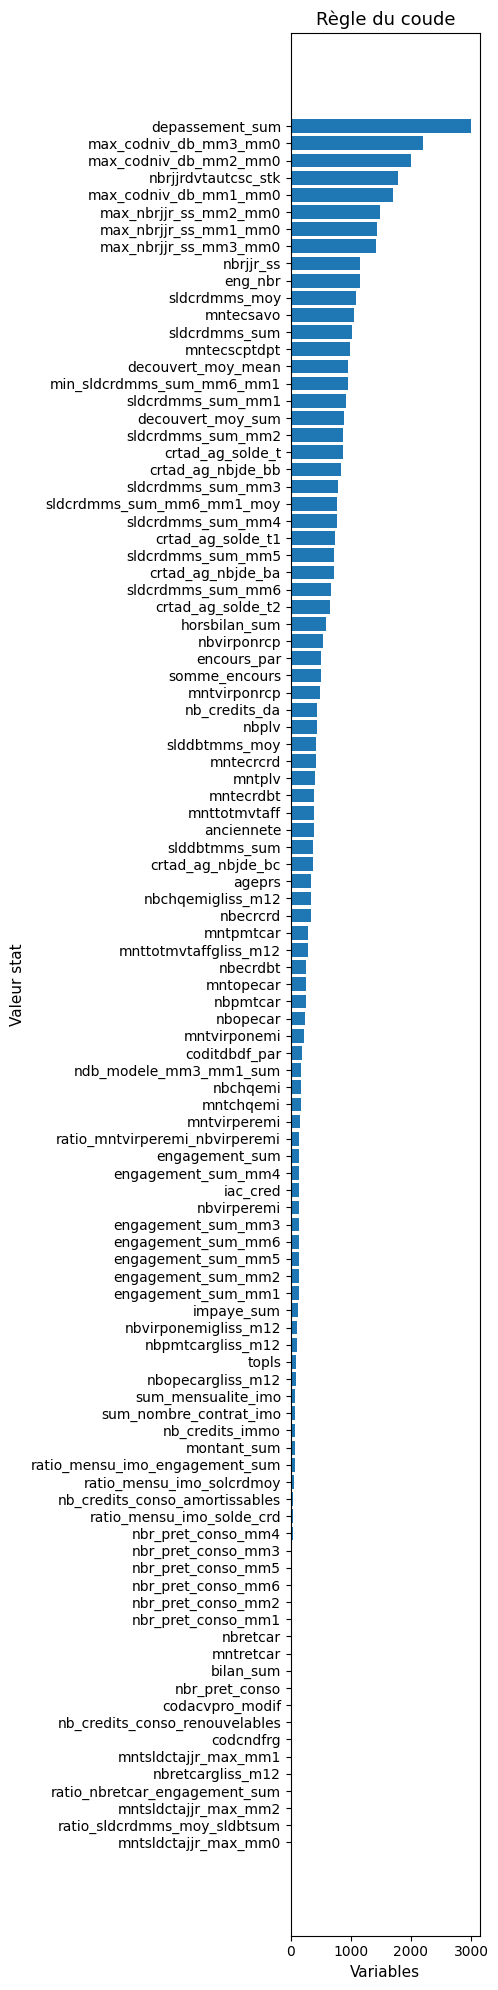

In [79]:
col_names=list(variables_quant["var"])
valeurs_stat=list(variables_quant["value"])
plot_regle_du_coude(col_names, valeurs_stat, titre="Règle du coude", tri=True)

In [80]:
nom_var_seuil="crtad_ag_solde_t2"
liste_triee = [x for _, x in sorted(zip(valeurs_stat, col_names), reverse=True)]
variables_pre_finales_quant=liste_triee[0:liste_triee.index(nom_var_seuil)+1]
print(f"Nombre de variables {len(variables_pre_finales_quant)} et les voici {variables_pre_finales_quant}")

Nombre de variables 29 et les voici ['depassement_sum', 'max_codniv_db_mm3_mm0', 'max_codniv_db_mm2_mm0', 'nbrjjrdvtautcsc_stk', 'max_codniv_db_mm1_mm0', 'max_nbrjjr_ss_mm2_mm0', 'max_nbrjjr_ss_mm1_mm0', 'max_nbrjjr_ss_mm3_mm0', 'nbrjjr_ss', 'eng_nbr', 'sldcrdmms_moy', 'mntecsavo', 'sldcrdmms_sum', 'mntecscptdpt', 'decouvert_moy_mean', 'min_sldcrdmms_sum_mm6_mm1', 'sldcrdmms_sum_mm1', 'decouvert_moy_sum', 'sldcrdmms_sum_mm2', 'crtad_ag_solde_t', 'crtad_ag_nbjde_bb', 'sldcrdmms_sum_mm3', 'sldcrdmms_sum_mm6_mm1_moy', 'sldcrdmms_sum_mm4', 'crtad_ag_solde_t1', 'sldcrdmms_sum_mm5', 'crtad_ag_nbjde_ba', 'sldcrdmms_sum_mm6', 'crtad_ag_solde_t2']


In [ ]:
##Etapes à venir
##Faire la discretisation
#Sélectionner les variables selon après discrétisation
#Lancer le modèle logistique
#Faire le tableau
##Calculer les performances

In [92]:
##discretisation avec les arbres
from sklearn.tree import DecisionTreeClassifier

def discretize_with_tree(df, col, cible, max_depth=1):
    X = df[[col]]
    y = df[cible]

    # Entraînement de l'arbre
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X, y)

    # Extraction et tri des seuils
    thresholds = tree.tree_.threshold[tree.tree_.threshold != -2]
    thresholds = np.sort(thresholds)

    # Discrétisation avec np.digitize
    discretized = pd.Series(np.digitize(df[col], bins=thresholds), index=df.index)

    nan_class = len(thresholds) + 1
    discretized[df[col].isna()] = nan_class

    return thresholds, discretized.astype('category')

##discretisation avec les centiles
def discretize_with_centiles(data, var, cible, nb_centiles=10, tolerance=0.02):
    df = data.copy()

    # 1️⃣ Calcul des centiles (en ignorant les NaN)
    centiles = np.percentile(df[var].dropna(), np.linspace(0, 100, nb_centiles + 1))
    df[f'{var}_centile'] = pd.cut(df[var], bins=centiles, include_lowest=True, labels=False)

    # 2️⃣ Calcul du taux de cible pour chaque centile (en ignorant les NaN)
    taux_cible = df.groupby(f'{var}_centile')[cible].mean()

    # 3️⃣ Regroupement des centiles contigus selon tolérance
    grouped_bins = []
    current_group = [0]
    for i in range(1, len(taux_cible)):
        if abs(taux_cible[i] - taux_cible[i - 1]) <= tolerance:
            current_group.append(i)
        else:
            grouped_bins.append(current_group)
            current_group = [i]
    grouped_bins.append(current_group)

    # 4️⃣ Fonction de mapping vers le bon groupe
    def map_to_group(centile):
        if pd.isna(centile):
            return len(grouped_bins)  # dernière classe = NaN
        for i, group in enumerate(grouped_bins):
            if centile in group:
                return i
        return np.nan

    return grouped_bins, df[f'{var}_centile'].apply(map_to_group).astype('category')

In [170]:
##on discretise all les variables qauantitatives
df_train2=df_train.copy()
for col in variables_pre_finales_quant:
    _, df_train2[col]=discretize_with_tree(df_train2, col, "cible")

In [171]:
## Validation des discretisations
def verifier_contraintes(df, var_discret, cible, min_pop=5, min_diff_cible=30):
    # 1. Calcul de la proportion de population par modalité
    counts = df[var_discret].value_counts(normalize=True)*100
    counts = counts.round(2)
    population_ok = (counts >= min_pop).all()

    # 2. Calcul du taux de cible par modalité
    taux_cible = df.groupby(var_discret, observed=True)[cible].mean()*100
    taux_cible=taux_cible.round(2)

    # Vérifier si la différence minimale entre toutes les paires de modalités est >= min_diff_cible
    taux_diff_ok = True
    modalities = taux_cible.index.tolist()

    for i in range(len(modalities)):
        for j in range(i+1, len(modalities)):
            diff = abs(taux_cible[modalities[i]] - taux_cible[modalities[j]])
            if diff < min_diff_cible:
                taux_diff_ok = False
                break
        if not taux_diff_ok:
            break

    details = {
        'proportions': counts.to_dict(),
        'taux_cible': taux_cible.to_dict()
    }

    return bool(population_ok and taux_diff_ok), details

def verifier_contraintes_for_all(df, var_discret_list, cible, min_pop=5, min_diff_cible=30):
    results = {}
    for var in var_discret_list:
        ok, details = verifier_contraintes(df, var, cible, min_pop, min_diff_cible)
        results[var] = {
            'ok': ok,
            'details': details
        }
    return results

In [172]:
all_results=verifier_contraintes_for_all(df_train2, variables_pre_finales_quant, "cible")
for _, var in enumerate(all_results):
    if all_results[var]['ok']==False:
        print(var)

depassement_sum
max_codniv_db_mm3_mm0
max_codniv_db_mm2_mm0
nbrjjrdvtautcsc_stk
max_codniv_db_mm1_mm0
max_nbrjjr_ss_mm2_mm0
max_nbrjjr_ss_mm1_mm0
max_nbrjjr_ss_mm3_mm0
nbrjjr_ss
eng_nbr
sldcrdmms_moy
mntecsavo
sldcrdmms_sum
mntecscptdpt
decouvert_moy_mean
min_sldcrdmms_sum_mm6_mm1
sldcrdmms_sum_mm1
decouvert_moy_sum
sldcrdmms_sum_mm2
crtad_ag_solde_t
crtad_ag_nbjde_bb
sldcrdmms_sum_mm3
sldcrdmms_sum_mm6_mm1_moy
sldcrdmms_sum_mm4
crtad_ag_solde_t1
sldcrdmms_sum_mm5
crtad_ag_nbjde_ba
sldcrdmms_sum_mm6
crtad_ag_solde_t2


In [173]:
def analyze_stability(df, col, cible):
    # 1️⃣ Calcul du taux de 1 par mois et par modalité
    taux = (
        df.groupby(['month', col], observed=True)[cible]
        .mean()
        .reset_index(name='taux_1')
    )
    
    # 2️⃣ Calcul de la proportion de chaque modalité par mois
    proportions = (
        df.groupby(['month', col], observed=True)
        .size()
        .reset_index(name='count')  # 👈 On nomme d'abord la colonne de comptage
    )
    
    # Calcul des proportions
    proportions['proportion'] = (
        proportions.groupby('month', observed=True)['count']
        .transform(lambda x: x / x.sum())
    )
    
    # On garde uniquement les colonnes utiles
    proportions = proportions[['month', col, 'proportion']].copy()
    
    # 3️⃣ Ordre chronologique des mois
    ordre_mois = ['Jan', 'Fev', 'Mars', 'Avril', 'Mai', 'Juin',
                  'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Dec']
    taux['month'] = pd.Categorical(taux['month'], categories=ordre_mois, ordered=True)
    proportions['month'] = pd.Categorical(proportions['month'], categories=ordre_mois, ordered=True)
    
    # 4️⃣ Graphique 1 : Évolution du taux de 1
    plt.figure(figsize=(5, 3))
    sns.lineplot(
        data=taux,
        x='month',
        y='taux_1',
        hue=col
    )
    plt.title("Évolution du risque selon les modalités et les mois")
    plt.ylabel("Taux de risque")
    plt.xlabel("Mois")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title=col)
    plt.show()
    
    # 5️⃣ Graphique 2 : Proportion des catégories par mois
    plt.figure(figsize=(5, 3))
    sns.lineplot(
        data=proportions,
        x='month',
        y='proportion',
        hue=col
    )
    plt.title("Répartition des catégories par mois")
    plt.ylabel("Proportion")
    plt.xlabel("Mois")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title=col)
    plt.show()

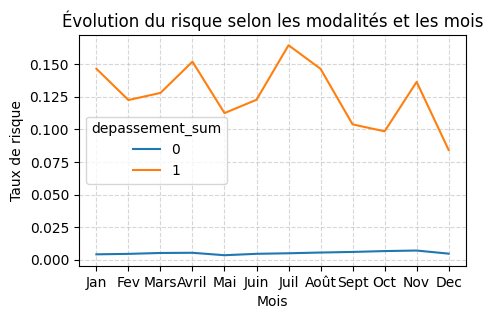

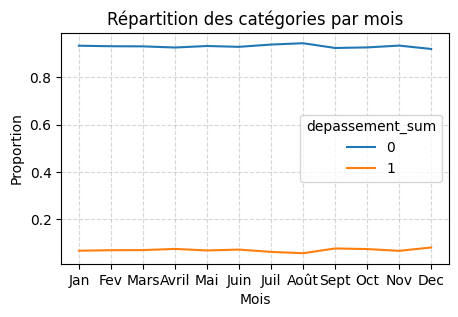

In [174]:
analyze_stability(df_train2, 'depassement_sum', 'cible')

In [ ]:
##Variables pre-finales

In [175]:
def ordonner_matrice_par_premiere_colonne(matrice_corr):
    # Nom de la première colonne
    col0 = matrice_corr.columns[0]

    # Obtenir l'ordre décroissant selon la première colonne
    ordre = matrice_corr[col0].sort_values(ascending=False).index

    # Réordonner les lignes et colonnes selon cet ordre
    matrice_reordonnee = matrice_corr.loc[ordre, ordre]

    return matrice_reordonnee 

def matrice_cramers_v(data, variables, seuil=5):
    result = pd.DataFrame(index=variables, columns=variables, dtype=float)
    for var1 in variables:
        for var2 in variables:
            if var1 == var2:
                result.loc[var1, var2] = 1.0
            else:
                v, _ = cramers_v(data, var1, var2, seuil=seuil)
                result.loc[var1, var2] = v         
    return ordonner_matrice_par_premiere_colonne(result)

In [176]:
def creer_liste_variables(var_qual, var_quant, cible):
    return [cible]+var_qual+var_quant

In [177]:
cols=creer_liste_variables(list(variables_qual_pre_finales["var"]), variables_pre_finales_quant, "cible")
matrices_v_cramers=matrice_cramers_v(df_train2, cols)

In [178]:
matrices_v_cramers

,cible,ind_dp_max,depassement_sum,client_haut_risque,mntecsavo,sldcrdmms_moy,max_codniv_db_mm3_mm0,sldcrdmms_sum,max_codniv_db_mm2_mm0,mntecscptdpt,...,sldcrdmms_sum_mm5,nbrjjr_ss,eng_nbr,crtad_ag_solde_t1,sldcrdmms_sum_mm6,crtad_ag_solde_t2,crtad_ag_nbjde_bb,decouvert_moy_mean,decouvert_moy_sum,crtad_ag_nbjde_ba
cible,1.000000,0.295660,0.262917,0.245346,0.235606,0.227294,0.226258,0.224229,0.215707,0.215529,...,0.163944,0.163207,0.161916,0.159467,0.159093,0.149286,0.143392,0.139654,0.136094,0.128216
ind_dp_max,0.295660,1.000000,0.836426,0.720339,0.249292,0.427582,0.514596,0.421421,0.539011,0.258242,...,0.243215,0.095324,0.345050,0.219509,0.241579,0.206997,0.194420,0.263911,0.275796,0.158352
depassement_sum,0.262917,0.836426,1.000000,0.387402,0.352466,0.367563,0.372408,0.384536,0.366697,0.366311,...,0.331404,0.085173,0.279049,0.321490,0.319422,0.305272,0.264342,0.269882,0.279573,0.221223
client_haut_risque,0.245346,0.720339,0.387402,1.000000,0.180589,0.322146,0.700060,0.298320,0.678888,0.219925,...,0.238999,0.042344,0.034129,0.195255,0.251822,0.177181,0.185289,0.132556,0.140176,0.171357
mntecsavo,0.235606,0.249292,0.352466,0.180589,1.000000,0.586214,0.137385,0.628475,0.139612,0.903117,...,0.358314,0.046030,0.155200,0.802237,0.351035,0.778292,0.786172,0.433763,0.401977,0.772338
sldcrdmms_moy,0.227294,0.427582,0.367563,0.322146,0.586214,1.000000,0.319617,0.898906,0.322078,0.649370,...,0.543098,0.048852,0.096704,0.473850,0.557452,0.399618,0.369319,0.298323,0.282685,0.330071
max_codniv_db_mm3_mm0,0.226258,0.514596,0.372408,0.700060,0.137385,0.319617,1.000000,0.296422,0.973381,0.163624,...,0.164120,0.064359,0.046273,0.140029,0.165408,0.121542,0.151502,0.133892,0.141485,0.104868
sldcrdmms_sum,0.224229,0.421421,0.384536,0.298320,0.628475,0.898906,0.296422,1.000000,0.298256,0.672739,...,0.584303,0.046490,0.101892,0.512341,0.585015,0.437065,0.386328,0.317388,0.301521,0.346896
max_codniv_db_mm2_mm0,0.215707,0.539011,0.366697,0.678888,0.139612,0.322078,0.973381,0.298256,1.000000,0.162912,...,0.161454,0.051614,0.039145,0.135002,0.162954,0.119292,0.141265,0.131450,0.137676,0.095514
mntecscptdpt,0.215529,0.258242,0.366311,0.219925,0.903117,0.649370,0.163624,0.672739,0.162912,1.000000,...,0.376357,0.055580,0.160498,0.822552,0.365443,0.793188,0.818871,0.521491,0.481491,0.800585


In [187]:
from sklearn.metrics import accuracy_score, roc_auc_score
import statsmodels.formula.api as smf

def has_perfect_modality(df, target, var):
    for modality, group in df.groupby(var):
        prop = group[target].mean()
        if prop == 0 or prop == 1:
            return True
    return False

def forward_selection_logit(data, target, cramers_matrix, threshold=0.6):
    df=data.copy()

    variables = [col for col in cramers_matrix.columns if col != target]
    selected_vars = []
    metrics_history = []
    y = df[target]

    for var in variables:
        # Si ce n’est pas la première variable, vérifier la corrélation
        if selected_vars:
            too_correlated = False
            for sel_var in selected_vars:
                if cramers_matrix.loc[var, sel_var] > threshold:
                    too_correlated = True
                    print(f"Variable '{var}' trop corrélée avec '{sel_var}', sautée.")
                    break
            if too_correlated or has_perfect_modality(df, target, var):
                print(f"Variable '{var}' sautée.")
                continue

        # Ajouter la variable (première ou non)
        selected_vars.append(var)

        formula = target + ' ~ ' + ' + '.join(
        [f"C({col})" for col in selected_vars if col != target]
        )
        print(formula)
        model = smf.logit(formula=formula, data=df).fit()
        # Ajuster le modèle logistique
        y_pred_prob = model.predict(df)
        y_pred = (y_pred_prob >= 0.5).astype(int)

        # Calculer les métriques sur le train
        accuracy = accuracy_score(y, y_pred)
        auc = roc_auc_score(y, y_pred_prob)

        metrics_history.append({
            'var': var,
            'accur': accuracy,
            'auc': auc
        })
    return pd.DataFrame(metrics_history)

In [188]:
##Sélection de variables finales
final_variables=forward_selection_logit(df_train2, "cible", matrices_v_cramers, threshold=0.6)

cible ~ C(ind_dp_max)
Optimization terminated successfully.
         Current function value: 0.056825
         Iterations 9
Variable 'depassement_sum' trop corrélée avec 'ind_dp_max', sautée.
Variable 'depassement_sum' sautée.
Variable 'client_haut_risque' trop corrélée avec 'ind_dp_max', sautée.
Variable 'client_haut_risque' sautée.
Variable 'mntecsavo' sautée.
cible ~ C(ind_dp_max) + C(sldcrdmms_moy)


C:\Users\SOP TECH\AppData\Local\Temp\ipykernel_17780\4018363460.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for modality, group in df.groupby(var):


Optimization terminated successfully.
         Current function value: 0.053844
         Iterations 9
Variable 'max_codniv_db_mm3_mm0' sautée.
Variable 'sldcrdmms_sum' trop corrélée avec 'sldcrdmms_moy', sautée.
Variable 'sldcrdmms_sum' sautée.


C:\Users\SOP TECH\AppData\Local\Temp\ipykernel_17780\4018363460.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for modality, group in df.groupby(var):


Variable 'max_codniv_db_mm2_mm0' sautée.
Variable 'mntecscptdpt' trop corrélée avec 'sldcrdmms_moy', sautée.
Variable 'mntecscptdpt' sautée.
Variable 'nbrjjrdvtautcsc_stk' trop corrélée avec 'sldcrdmms_moy', sautée.
Variable 'nbrjjrdvtautcsc_stk' sautée.
Variable 'sldcrdmms_sum_mm1' trop corrélée avec 'sldcrdmms_moy', sautée.
Variable 'sldcrdmms_sum_mm1' sautée.
Variable 'min_sldcrdmms_sum_mm6_mm1' trop corrélée avec 'sldcrdmms_moy', sautée.
Variable 'min_sldcrdmms_sum_mm6_mm1' sautée.
Variable 'max_codniv_db_mm1_mm0' sautée.
Variable 'max_nbrjjr_ss_mm2_mm0' sautée.
Variable 'sldcrdmms_sum_mm2' trop corrélée avec 'sldcrdmms_moy', sautée.
Variable 'sldcrdmms_sum_mm2' sautée.
Variable 'max_nbrjjr_ss_mm3_mm0' sautée.
Variable 'max_nbrjjr_ss_mm1_mm0' sautée.
Variable 'crtad_ag_solde_t' sautée.
cible ~ C(ind_dp_max) + C(sldcrdmms_moy) + C(sldcrdmms_sum_mm3)
Optimization terminated successfully.
         Current function value: 0.053512
         Iterations 9


C:\Users\SOP TECH\AppData\Local\Temp\ipykernel_17780\4018363460.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for modality, group in df.groupby(var):


cible ~ C(ind_dp_max) + C(sldcrdmms_moy) + C(sldcrdmms_sum_mm3) + C(sldcrdmms_sum_mm6_mm1_moy)
Optimization terminated successfully.
         Current function value: 0.053447
         Iterations 9
Variable 'sldcrdmms_sum_mm4' trop corrélée avec 'sldcrdmms_sum_mm3', sautée.
Variable 'sldcrdmms_sum_mm4' sautée.
Variable 'sldcrdmms_sum_mm5' trop corrélée avec 'sldcrdmms_sum_mm3', sautée.
Variable 'sldcrdmms_sum_mm5' sautée.
cible ~ C(ind_dp_max) + C(sldcrdmms_moy) + C(sldcrdmms_sum_mm3) + C(sldcrdmms_sum_mm6_mm1_moy) + C(nbrjjr_ss)


C:\Users\SOP TECH\AppData\Local\Temp\ipykernel_17780\4018363460.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for modality, group in df.groupby(var):


Optimization terminated successfully.
         Current function value: 0.052502
         Iterations 9


C:\Users\SOP TECH\AppData\Local\Temp\ipykernel_17780\4018363460.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for modality, group in df.groupby(var):


cible ~ C(ind_dp_max) + C(sldcrdmms_moy) + C(sldcrdmms_sum_mm3) + C(sldcrdmms_sum_mm6_mm1_moy) + C(nbrjjr_ss) + C(eng_nbr)
Optimization terminated successfully.
         Current function value: 0.052315
         Iterations 9


C:\Users\SOP TECH\AppData\Local\Temp\ipykernel_17780\4018363460.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for modality, group in df.groupby(var):


Variable 'crtad_ag_solde_t1' sautée.
Variable 'sldcrdmms_sum_mm6' trop corrélée avec 'sldcrdmms_sum_mm3', sautée.
Variable 'sldcrdmms_sum_mm6' sautée.
Variable 'crtad_ag_solde_t2' sautée.
Variable 'crtad_ag_nbjde_bb' sautée.
cible ~ C(ind_dp_max) + C(sldcrdmms_moy) + C(sldcrdmms_sum_mm3) + C(sldcrdmms_sum_mm6_mm1_moy) + C(nbrjjr_ss) + C(eng_nbr) + C(decouvert_moy_mean)
Optimization terminated successfully.
         Current function value: 0.050539
         Iterations 10
Variable 'decouvert_moy_sum' trop corrélée avec 'decouvert_moy_mean', sautée.
Variable 'decouvert_moy_sum' sautée.
Variable 'crtad_ag_nbjde_ba' trop corrélée avec 'decouvert_moy_mean', sautée.
Variable 'crtad_ag_nbjde_ba' sautée.


In [189]:
final_variables

,var,accur,auc
0,ind_dp_max,0.986286,0.776060
1,sldcrdmms_moy,0.986286,0.849133
2,sldcrdmms_sum_mm3,0.986286,0.877078
3,sldcrdmms_sum_mm6_mm1_moy,0.986286,0.885150
4,nbrjjr_ss,0.986541,0.887249
5,eng_nbr,0.986587,0.887905
6,decouvert_moy_mean,0.986541,0.914397


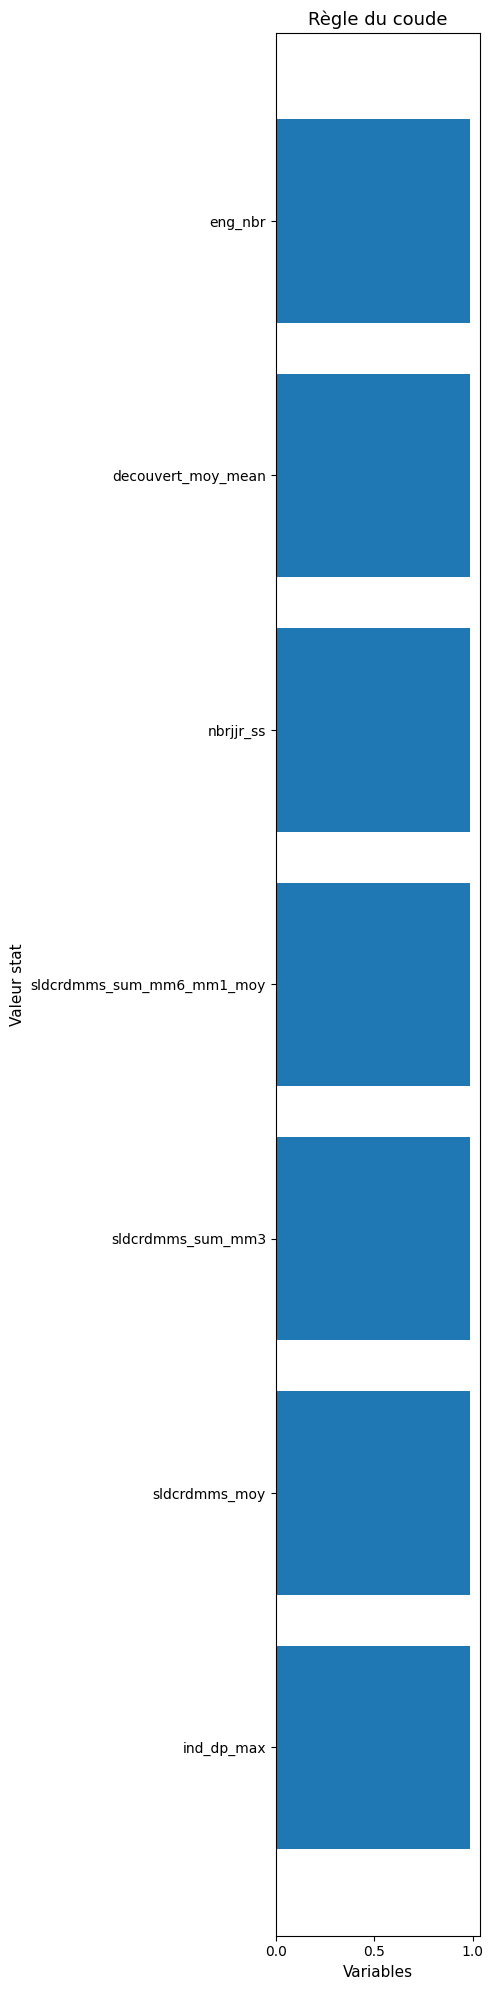

In [190]:
plot_regle_du_coude(list(final_variables["var"]), list(final_variables["accur"]), titre="Règle du coude", tri=True)

In [ ]:
plot_regle_du_coude(final_variables["var"], final_variables["auc"], titre="Règle du coude", tri=True)

In [ ]:
##Variables finales


In [268]:
def reorder_modalites(data, col, cible):
    # 1️⃣ Calcul du taux de 1 par modalité
    df=data.copy()
    taux = df.groupby(col)[cible].mean().sort_values()
    
    # 2️⃣ Création d’un mapping modalité → code ordonné
    mapping = {modalite: i for i, modalite in enumerate(taux.index)}
    
    return df[col].map(mapping), mapping

def reorder_modalites_for_list(df, cat_vars, cible):
    for col in cat_vars:
        df[col], _ = reorder_modalites(df, col, cible)
    return df

In [ ]:
import statsmodels.formula.api as smf
def launching_logistique_model(data_train, target):
    df=data_train.copy()
    cat_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
    df=reorder_modalites_for_list(df, cat_vars, target)
    # Partie explicative : C() pour les catégorielles, rien pour les numériques
    formula = target + ' ~ ' + ' + '.join(
        [f"C({col})" for col in df.columns if col != target]
    )
    model = smf.logit(formula=formula, data=df).fit()
    print(model.summary())
    return model

In [272]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, average_precision_score, auc, brier_score_loss

def reliability_diagram(y_true, y_score, n_bins=20):
    prob_true, prob_pred = calibration_curve(y_true, y_score, n_bins=n_bins)

    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), sharex=True, constrained_layout=True)
    
    ax1.plot(prob_pred, prob_true, marker='o', linewidth=2, label=f"Model (Brier={brier_score_loss(y_true, y_score):.2%})")
    ax1.plot([0,1],[0,1], linestyle='--', color='gray', label='Perfect calibration')
    ax1.set_xlabel("Mean predicted probability")
    ax1.set_ylabel("Fraction of positives")
    ax1.set_title("Reliability diagram (calibration curve)")
    ax1.legend(loc="best")
    ax1.grid(alpha=0.3)
    
    ax2.hist(y_score, bins=n_bins, color='C0', edgecolor='k', alpha=0.7)
    ax2.set_xlabel("Predicted probability")
    ax2.set_ylabel("Count")
    ax2.set_title("Histogram of predicted probabilities")
    ax2.grid(alpha=0.2)
    
    N = len(y_score) if len(y_score) > 0 else 1
    ax_perc = ax2.twinx()

    primary_yticks = ax2.get_yticks()
    secondary_yticks = primary_yticks / N 

    ax_perc.set_yticks(primary_yticks)  # positionner aux mêmes valeurs numériques que l'axe gauche
    ax_perc.set_ylim(ax2.get_ylim())  # garder mêmes limites pour alignement visuel
    ax_perc.set_ylabel("Share of total (%)")
    ax_perc.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{100.0 * (y / N):.0f}%"))
    
    plt.show()

def auc_roc_plot(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, color="C0", lw=2, label=f"ROC (AUC = {roc_auc:.2%})")
    plt.plot([0,1],[0,1], color="grey", lw=1, linestyle="--", label="Alea")
    plt.fill_between(fpr, tpr, alpha=0.15, color="C0")
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Courbe ROC")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

def auc_pr_plot(y_true, y_pred_prob):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob)
    plt.figure(figsize=(7,6))
    plt.plot(recall, precision, color="C0", lw=2, label=f"PR curve (AP = {average_precision_score(y_true, y_score):.2%})")
    plt.hlines(y_true.mean(), 0, 1, colors="grey", linestyles="--", label=f"Baseline (prevalence = {y_true.mean():.2%})")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Courbe Precision-Recall")
    plt.legend(loc="lower left")
    plt.grid(alpha=0.3)
    plt.show()

def metrics_for_model(model, X_test, y_true):
    y_pred_prob = model.predict(X_test)
    # 2️⃣ Transformer en classes (0 ou 1) selon un seuil (souvent 0.5)
    y_pred = (y_pred_prob >= 0.5).astype(int)
    # AUC ROC
    auc_roc_plot(y_true, y_pred_prob)
    #4️⃣ Calcul des métriques
    print("✅ Accuracy :", accuracy_score(y_true, y_pred))
    print("✅ Confusion matrix :\n", confusion_matrix(y_true, y_pred))
    print("\n✅ Rapport de classification :\n", classification_report(y_true, y_pred))
    ##AUC PR
    auc_pr_plot(y_true, y_pred_prob)
    #Score de brier
    reliability_diagram(y_true, y_pred_prob)